In [0]:
import numpy as np
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist


load mnist dataset

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

compute the number of labels

In [0]:
num_labels = len(np.unique(y_train))

convert to one-hot vector

In [0]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

input image dimensions

In [0]:
image_size=x_train.shape[1]

resize and normalize

In [0]:
x_train=np.reshape(x_train,[-1, image_size, image_size,1])
x_test=np.reshape(x_test,[-1,image_size,image_size,1])
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

network parameters

In [0]:
input_shape=(image_size, image_size,1)
batch_size=128
kernel_size=3
pool_size=2
filters=64
dropout=0.5

model is a stack of CNN-ReLu-MaxPooling

In [10]:
model=Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size))
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size,
                 activation='relu'))
model.add(Flatten())

dropout added as regularizer

In [11]:
model.add(Dropout(dropout))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


output layer is 10-dim one-hot vector

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                77450     
_________________________________________________________________
activation_1 (Activation)    (None, 10)               

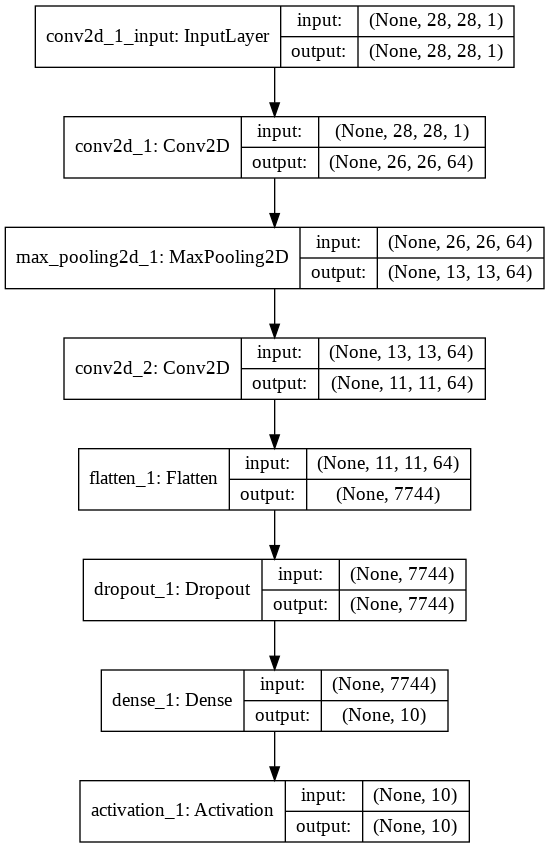

In [12]:
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.summary()
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)


loss function for one-hot vector
use of adam optimizer
accuracy is good metric for classification tasks

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

train the network

In [14]:
model.fit(x_train, y_train, epochs=10, batch_size=batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 73s 1ms/step - loss: 0.2342 - acc: 0.9315
Epoch 2/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0736 - acc: 0.9778
Epoch 3/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0544 - acc: 0.9838
Epoch 4/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0449 - acc: 0.9863
Epoch 5/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0379 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.0350 - acc: 0.9888
Epoch 7/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0305 - acc: 0.9902
Epoch 8/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0280 - acc: 0.9909
Epoch 9/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.0247 - acc: 0.992

In [15]:
loss, acc=model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/10000 [==============================] - 3s 322us/step

Test accuracy: 99.2%
